# Quantum Computing. Week 2 demo tasks. 

In [1]:
import qiskit 
from qiskit import IBMQ,Aer
from math import pi, acos, sin, cos
qiskit.__qiskit_version__
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram

In [2]:
IBMQ.load_account()

/opt/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
my_provider = IBMQ.get_provider()
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

Problem 1: Separable and entangled states

We can see an advice in D.Mermin textbook

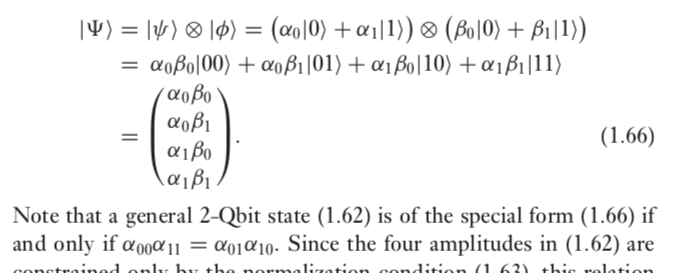

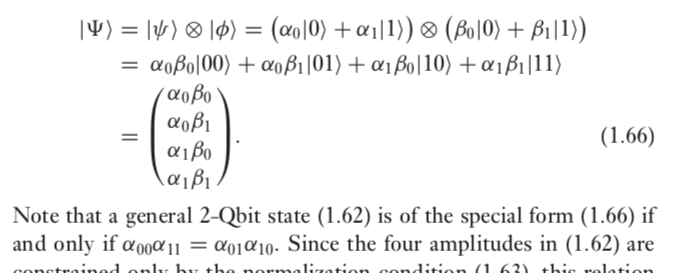

In [ ]:
# So, let's check all the states:

a) $\frac{2}{3} \cdot  \frac{-2}{3} \neq  \frac{1}{3} \cdot 0$ - the state is entangled

c) $\frac{1}{2} \cdot  \frac{1}{2} \neq  \frac{1}{2} \cdot -\frac{1}{2}$ - the state is entangled 

b) $\frac{1}{2} \cdot  \frac{1}{2} =  i\frac{1}{2} \cdot -i\frac{1}{2}$ - the state is separable, and we can
represent it  as a tensor product choosing in an arbitrary orthogonal basis, eg:

$ \frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle - i|1\rangle)$

Problem 2: Preparation of the general 2-Qubit pure state

An arbitrary two-qubit state |ψ ⟩ is a linear combination of the four base states |00⟩ , |01⟩ , |10⟩ , |11⟩ such that the square sum of the magnitudes of the coefficients is 1. In terms of a quantum circuit, this is the simplest case of the circuit defined above in the Schmidt decomposition, and may be accomplished with three 1-qubit gates and exactly 1 CNOT gate

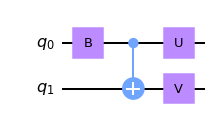

In [20]:
q = qiskit.QuantumRegister(2, 'q')
circuit = qiskit.QuantumCircuit(q)
my_gateB = qiskit.circuit.Gate(name='B', num_qubits=1, params=[])
my_gateU = qiskit.circuit.Gate(name='U', num_qubits=1, params=[])
my_gateV = qiskit.circuit.Gate(name='V', num_qubits=1, params=[])
circuit.append(my_gateB, [q[0]])
circuit.cx(0, 1)
circuit.append(my_gateU, [q[0]])
circuit.append(my_gateV, [q[1]])
circuit.draw('mpl')

In [22]:
# Reconstruct SVD
from numpy import array
from numpy import diag
from numpy import dot
from scipy.linalg import svd
# define a matrix
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A)
# Singular-value decomposition
U, s, VT = svd(A)
# create n x n Sigma matrix
Sigma = diag(s)
# reconstruct matrix
B = U.dot(Sigma.dot(VT))
print(B)



[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [35]:
# define a matrix
A = array([[1/2**(1/2), 0], [0, 1/2**(1/2)]])
print(A)
# SVD
s = array([[1/2**(1/2), 0], [0, 1/2**(1/2)]])
U, s, VT = svd(A)




[[0.70710678 0.        ]
 [0.         0.70710678]]


In [36]:
print(U)

[[1. 0.]
 [0. 1.]]


In [38]:
print(s)

[0.70710678 0.70710678]


In [37]:
print(VT)

[[1. 0.]
 [0. 1.]]
